In [4]:
# Celda para importar librerías, costantes, etc.
import tensorflow as tf
import pandas as pd
import numpy as np
import soundfile as sf
import librosa
import gc
import mido
import math
import copy

from matplotlib import pyplot as plt
from IPython import display
from tqdm import tqdm

from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Para entrenarlo en mi equipor personal:
PATH = '/Volumes/TheVault/Documentos Mac/Documentos UC/4o Curso/2o Cuatrimestre/Trabajo de Fin de Grado/maestro-v3.0.0/'
# PATH = '../maestro-v3.0.0/'

In [5]:
def get_dataframe(path=PATH + 'maestro-v3.0.0.csv'):
    return pd.read_csv(path)

def set_dataframe(df, path=PATH + 'maestro-v3.0.0.csv'):
    df.to_csv(path, index=False)

In [6]:
df = get_dataframe()
df.head()

,Unnamed: 0,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration,data_cached,epochs_trained
0,0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160,True,0
1,1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471,True,0
2,2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433,True,0
3,3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588,True,0
4,4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508,True,0


In [7]:
#Parámetros de configuración de los archivos de audio
SAMPLING_RATE = 16000
N_NOTES = 88

In [8]:
# Constantes relativas al estádar MIDI
DEFAULT_SR = 500000

In [9]:
from utils.midi_handler import Midi_handler
midi_hdlr = Midi_handler(sampling_rate=SAMPLING_RATE, dir_path=PATH, n_notes=N_NOTES)

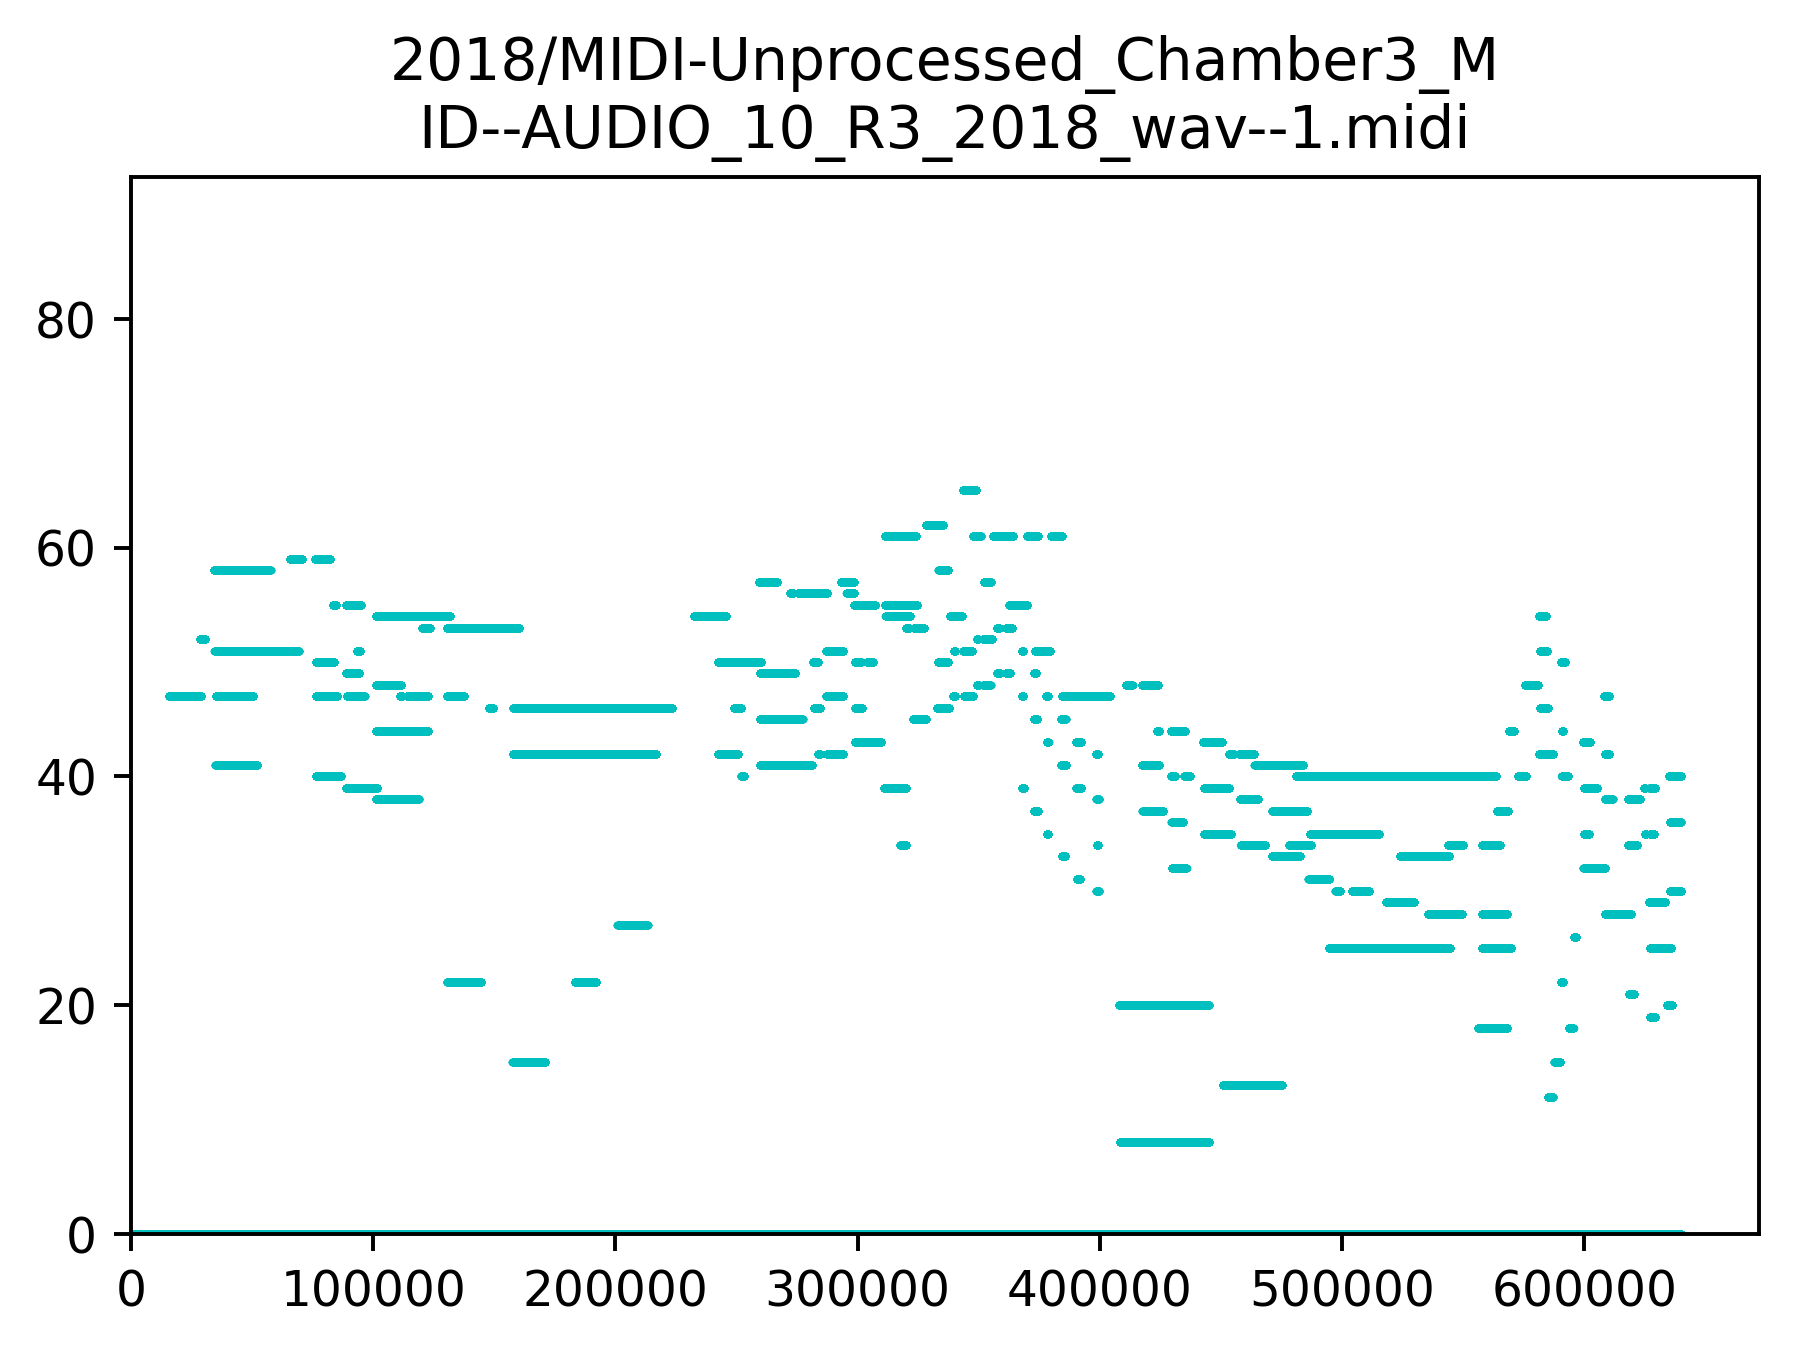

In [10]:
title = df['midi_filename'][0]
break_ = int(len(title)/2)
title = title[:break_] + '\n' + title[break_:]
# Ploteamos una sección de un pianoroll de ejemplo
midi_hdlr.plot_pianoroll(midi_hdlr.vectorize_midi(df['midi_filename'][0])[0:640000], title=title)

In [11]:
# Constates para aplicar la normalización a los ficheros MIDI
MIDI_MAX = 127
MIDI_MIN = 0

In [12]:
from utils.wav_handler import Wav_handler
wav_hdlr = Wav_handler(sampling_rate=SAMPLING_RATE, dir_path=PATH)

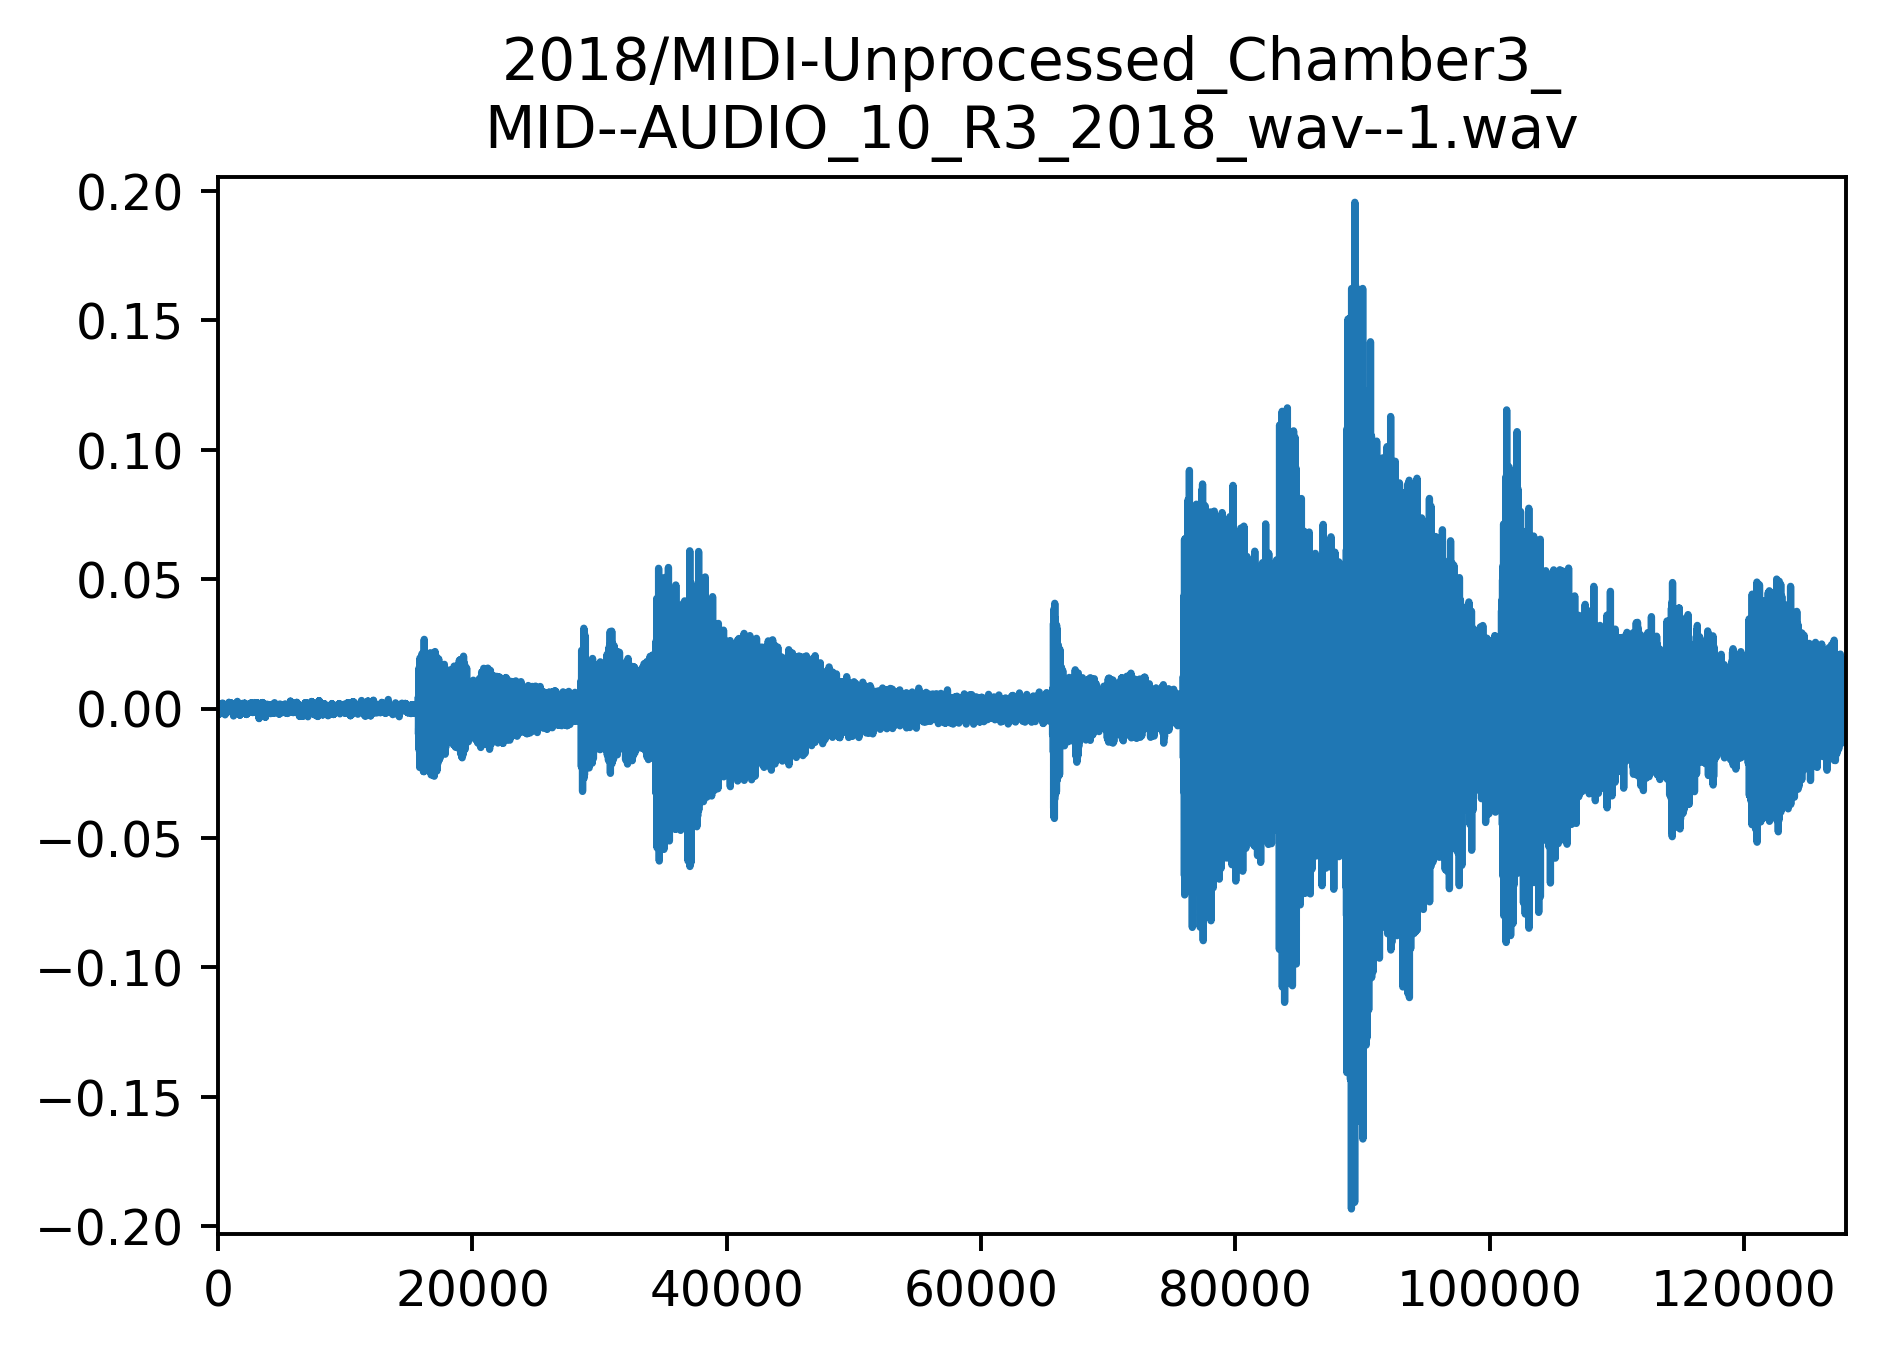

In [13]:
title = df['audio_filename'][0]
break_ = int(len(title)/2)
title = title[:break_] + '\n' + title[break_:]
# Ploteamos una sección de una onda
wav_hdlr.plot_wav(wav_hdlr.vectorize_wav(df['audio_filename'][0])[0:128000], title=title)